In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
%matplotlib inline

In [2]:
df=pd.read_csv('economic_index.csv')

In [3]:
df

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [5]:
df=df.drop(columns=['Unnamed: 0','year','month'])

In [6]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [8]:
df.isna().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

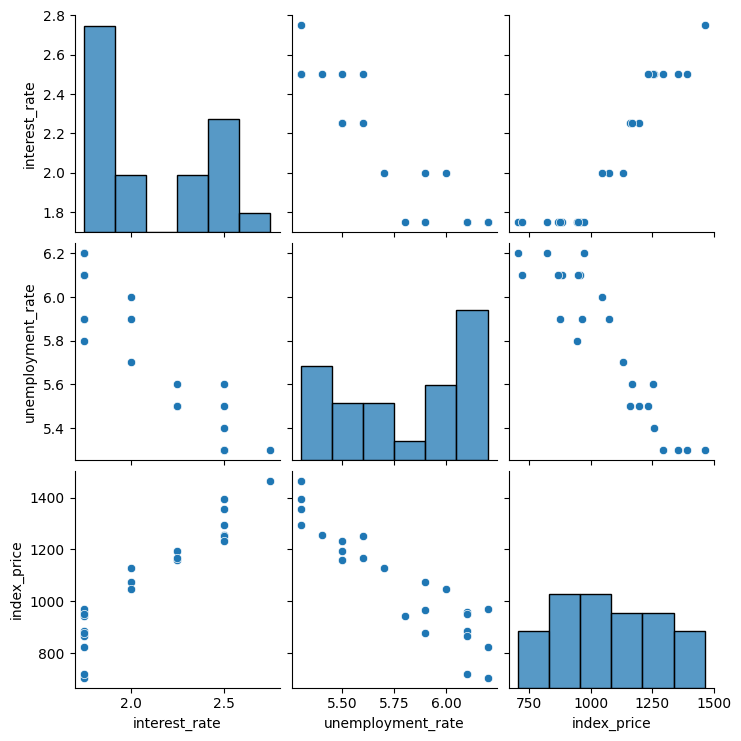

In [10]:
sns.pairplot(df)

In [11]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

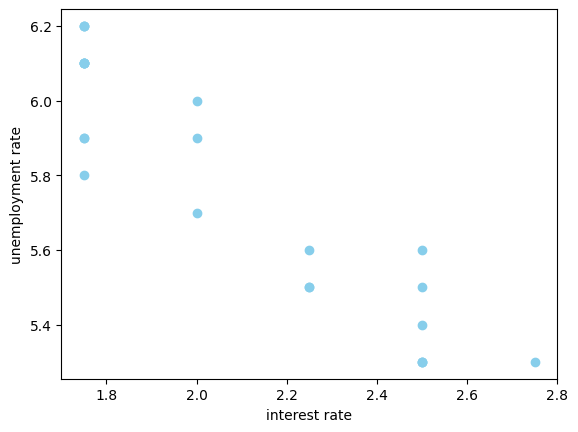

In [14]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='skyblue')
plt.xlabel('interest rate')
plt.ylabel('unemployment rate')

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

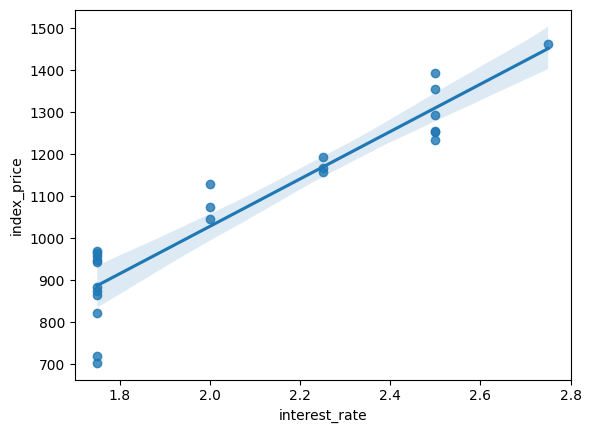

In [25]:
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

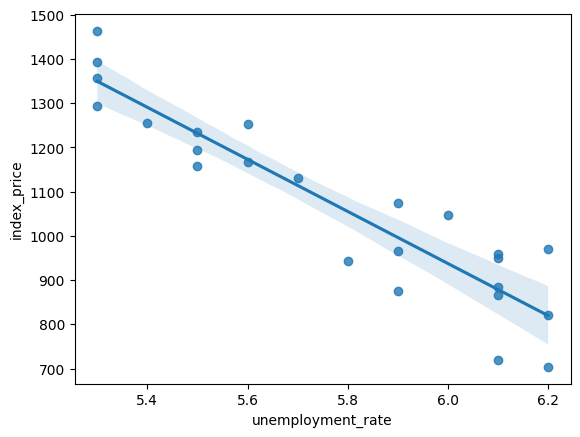

In [26]:
sns.regplot(x=df['unemployment_rate'],y=df['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='interest_rate'>

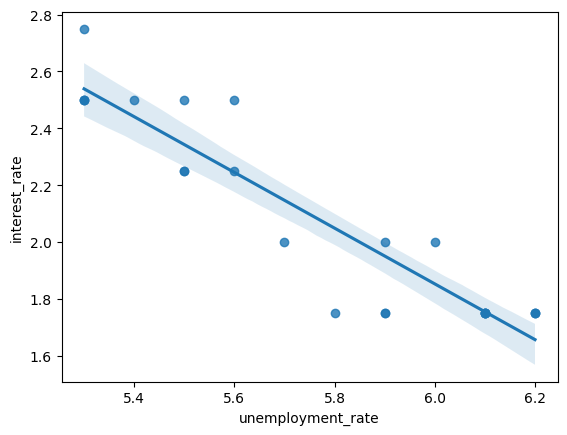

In [28]:
sns.regplot(x=df['unemployment_rate'],y=df['interest_rate'])

In [30]:
scaler=StandardScaler()

In [31]:
x_train=scaler.fit_transform(x_train)

In [32]:
x_test=scaler.transform(x_test)

In [34]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [38]:
validation_score=cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [39]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [40]:
y_pred=model.predict(x_test)

In [44]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r_2=r2_score(y_test,y_pred)
print(f'mae is {mae}')
print(f'mse is {mse}')
print(f'rmse is {rmse}')
print(f'r_2 score is {r_2}')

mae is 59.935781523235505
mse is 5793.762887712575
rmse is 76.11677139574809
r_2 score is 0.8278978091457143


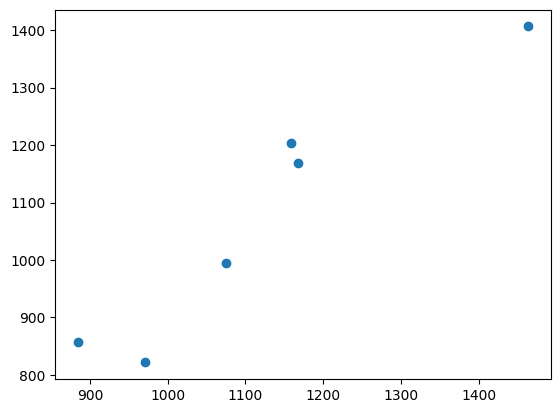

In [45]:
plt.scatter(y_test,y_pred)

In [46]:
res=y_test-y_pred

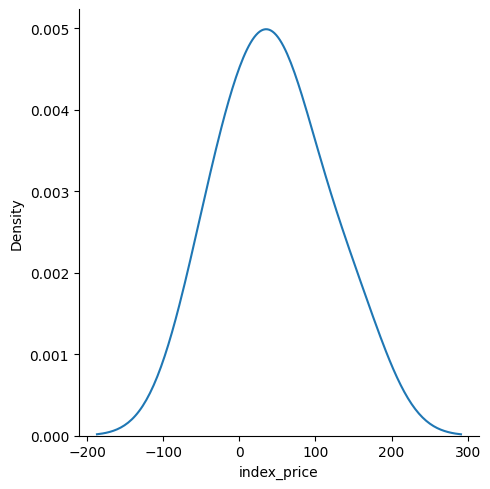

In [47]:
sns.displot(res,kind='kde')

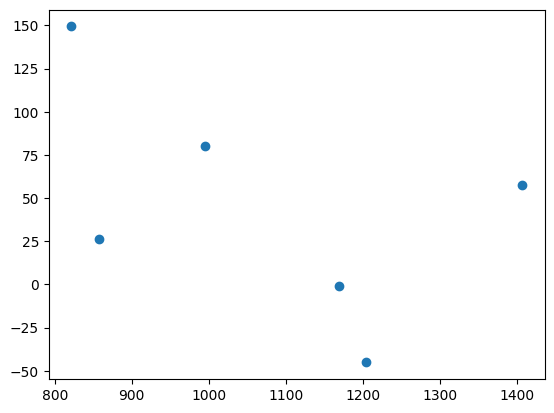

In [48]:
plt.scatter(y_pred,res)

In [51]:
model=sm.OLS(y_train,x_train).fit()

In [52]:
pred=model.predict(x_test)

In [53]:
model.summary()

C:\Users\DELL 5520\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 05 Oct 2024   Prob (F-statistic):                       0.754
Time:                        23:50:10   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""